In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from jitcsde import jitcsde, y, t

In [2]:
dt = 0.01

n_s = 10 ** 4      # time for time-series become stationary
n = 10 ** 6        # number of data points in final time-series

N = n + n_s

time = np.arange(0, N) * dt

df = []

g = np.arange(0.1, 0.8, 0.1)

for g_i in g:
    
    t_series = np.zeros((N, 2))

    drift = [4 * y(0) - y(0) ** 3,
            -y(0) * y(1)]

    diffusion = [g_i, g_i]

    I = jitcsde(drift, diffusion)

    I.set_integration_parameters(atol=1e-8, first_step=0.001, max_step=0.01, min_step=1e-13)

    # Dynamical analysis shows that a negative initial value for x1 results in x2 divergence
    I.set_initial_value([10.0, 0.0], 0)

    for j, t_j in enumerate(time):
        t_series[j] = I.integrate(t_j)

    t_series = pd.DataFrame(t_series[n_s:], columns=['$x_1$', '$x_2$'])
    t_series['$t$'] = time[n_s:] - time[n_s]
    t_series['$g$'] = np.round(g_i, 1)

    df.append(t_series)
    
df = pd.concat(df, ignore_index=True)

Generating, compiling, and loading C code.
Generating, compiling, and loading C code.
Generating, compiling, and loading C code.
Generating, compiling, and loading C code.
Generating, compiling, and loading C code.
Generating, compiling, and loading C code.
Generating, compiling, and loading C code.


<Figure size 1800x1600 with 0 Axes>

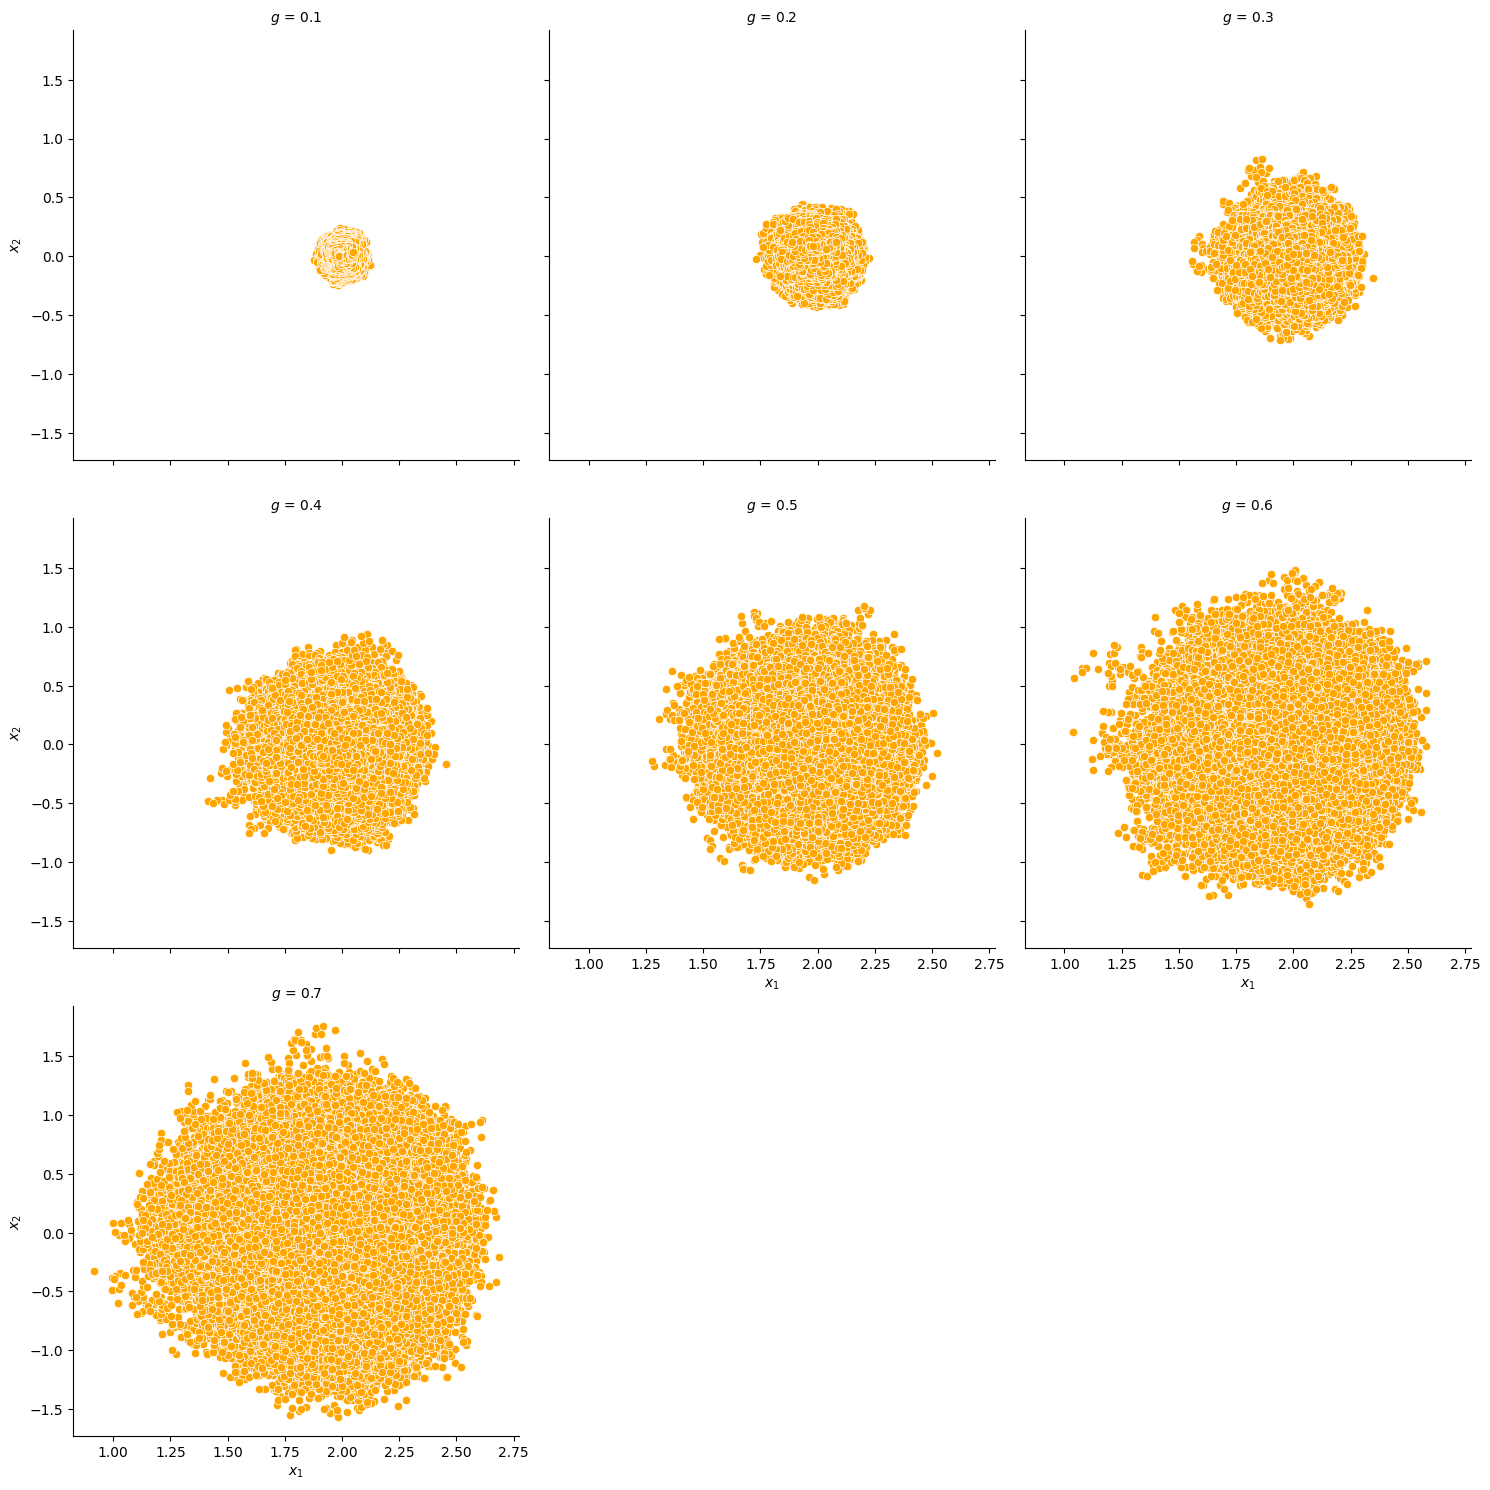

In [3]:
fig = plt.figure(figsize=(18, 16), layout='constrained')

grid = sns.relplot(data=df,
                   x='$x_1$',
                   y='$x_2$',
                   col='$g$',
                   col_wrap=3,
                   color='orange',
                   kind='scatter'
                   );